In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('lang_scores.csv')
data

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
0,0,0.15,0.38,0.22,0.24,1
1,1,0.06,0.06,0.02,0.35,1
2,2,0.24,0.28,0.01,0.39,1
3,3,0.33,0.08,0.05,0.07,1
4,4,0.12,0.21,0.13,0.12,1
...,...,...,...,...,...,...
295,295,0.99,0.87,0.93,0.99,3
296,296,0.82,0.99,0.94,0.81,3
297,297,0.86,0.94,0.81,0.92,3
298,298,0.87,0.92,0.81,0.97,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   Reading     300 non-null    float64
 2   Listening   300 non-null    float64
 3   Speaking    300 non-null    float64
 4   Writing     300 non-null    float64
 5   LangLevel   300 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 14.2 KB


In [5]:
data.describe()

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.505433,0.512200,0.465733,0.519967,2.006667
std,86.746758,0.275526,0.275298,0.280242,0.277404,0.809613
min,0.000000,0.000000,0.000000,0.010000,0.010000,1.000000
25%,74.750000,0.310000,0.287500,0.220000,0.297500,1.000000
50%,149.500000,0.525000,0.520000,0.440000,0.570000,2.000000
75%,224.250000,0.730000,0.750000,0.690000,0.742500,3.000000
max,299.000000,1.000000,0.990000,0.990000,1.000000,3.000000


### EDA

In [7]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
data

,Reading,Listening,Speaking,Writing,LangLevel
0,0.15,0.38,0.22,0.24,1
1,0.06,0.06,0.02,0.35,1
2,0.24,0.28,0.01,0.39,1
3,0.33,0.08,0.05,0.07,1
4,0.12,0.21,0.13,0.12,1
...,...,...,...,...,...
295,0.99,0.87,0.93,0.99,3
296,0.82,0.99,0.94,0.81,3
297,0.86,0.94,0.81,0.92,3
298,0.87,0.92,0.81,0.97,3


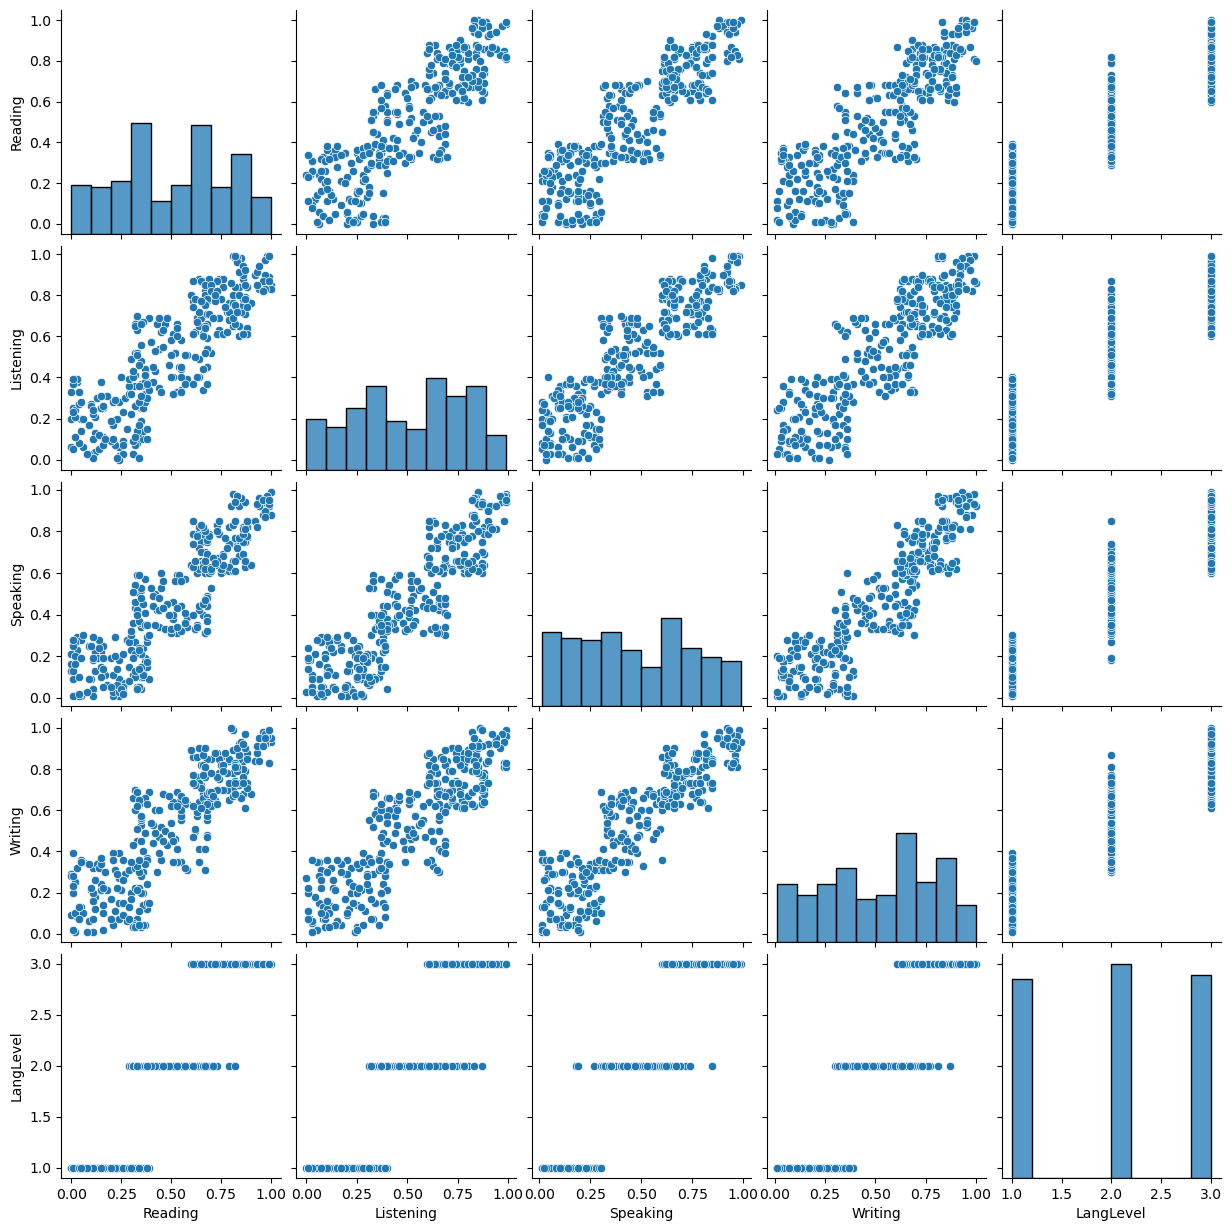

In [9]:
sns.pairplot(data)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

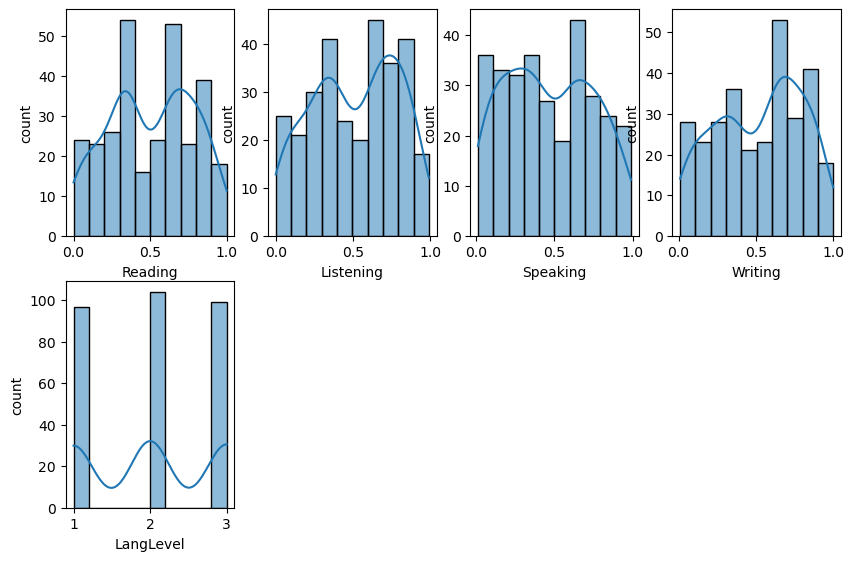

In [11]:
plt.figure(figsize=(10,10), facecolor="white")
plot=1

for columns in data:
    if plot <=9:
        ax=plt.subplot(3,4,plot)
        sns.histplot(data[columns], kde=True)
        plt.xlabel(columns, fontsize=10)
        plt.ylabel("count", fontsize=10)
    plot+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

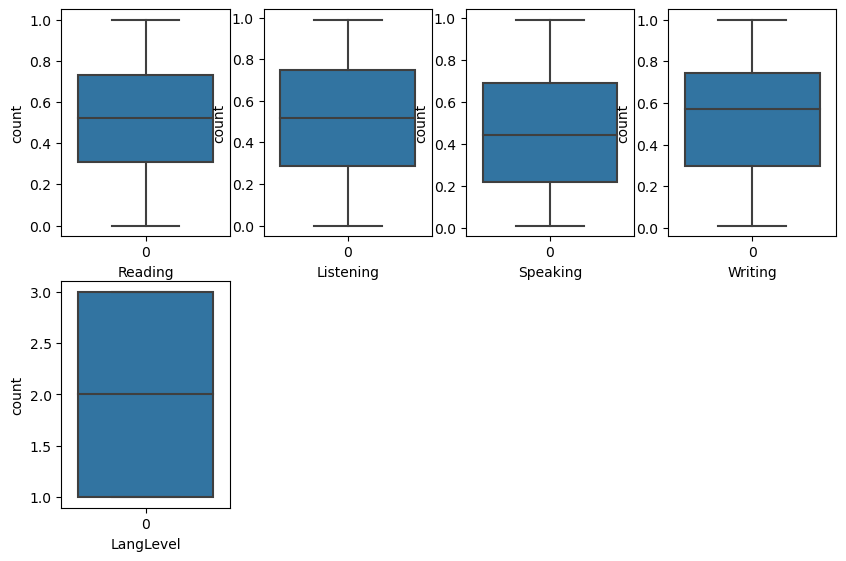

In [12]:
plt.figure(figsize=(10,10), facecolor="white")
plot=1

for columns in data:
    if plot <=9:
        ax=plt.subplot(3,4,plot)
        sns.boxplot(data[columns])
        plt.xlabel(columns, fontsize=10)
        plt.ylabel("count", fontsize=10)
    plot+=1
plt.tight_layout

In [13]:
data.isna().sum()

Reading      0
Listening    0
Speaking     0
Writing      0
LangLevel    0
dtype: int64

In [14]:
data.corr()

,Reading,Listening,Speaking,Writing,LangLevel
Reading,1.000000,0.844408,0.874050,0.849934,0.895069
Listening,0.844408,1.000000,0.887416,0.862021,0.901459
Speaking,0.874050,0.887416,1.000000,0.896579,0.919503
Writing,0.849934,0.862021,0.896579,1.000000,0.908085
LangLevel,0.895069,0.901459,0.919503,0.908085,1.000000


<Axes: >

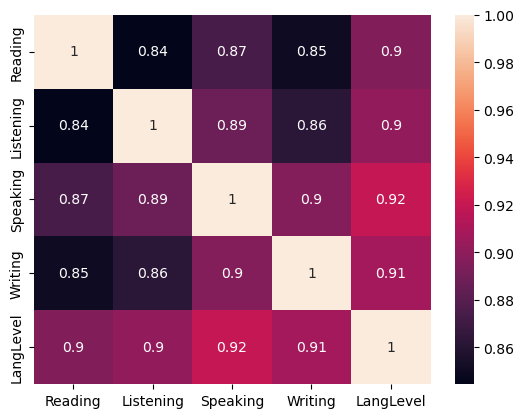

In [15]:
sns.heatmap(data.corr(),annot=True)

In [16]:
data.columns

Index(['Reading', 'Listening', 'Speaking', 'Writing', 'LangLevel'], dtype='object')

In [17]:
x=data[['Reading', 'Listening', 'Speaking', 'Writing']]

In [19]:
y=data['LangLevel']

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
KN=KNeighborsClassifier(n_neighbors=5)

In [22]:
KN.fit(x,y)

KNeighborsClassifier()

In [23]:
y_predict=KN.predict(x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [25]:
cm=confusion_matrix(y,y_predict)
cm

array([[97,  0,  0],
       [ 1, 98,  5],
       [ 0,  2, 97]], dtype=int64)

In [27]:
score=accuracy_score(y,y_predict)
score

0.9733333333333334

### Hyperparameter Tunning

In [31]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [33]:
grid = GridSearchCV(KN, param_grid, cv=5, scoring='accuracy')
grid.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [35]:
models=KNeighborsClassifier(n_neighbors= 9, p=1, weights= 'uniform',algorithm='auto')
models.fit(x,y)

KNeighborsClassifier(n_neighbors=9, p=1)

In [36]:
y_predict=models.predict(x)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], d

In [37]:
score=accuracy_score(y,y_predict)
score

0.9766666666666667